# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import the OpenWeatherMap API key
from api_keys import weather_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nova sintra
Processing Record 2 of Set 1 | yuzhno-kurilsk
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | fale old settlement
Processing Record 5 of Set 1 | hammerfest
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | nizhniy kuranakh
Processing Record 9 of Set 1 | lompoc
Processing Record 10 of Set 1 | codrington
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | utrik
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | khark
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | grand forks
Processing Record 18 of Set 1 | torghay
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | madalena
Processing Record 22 of Set 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nova sintra,14.8667,-24.7167,22.89,79,100,6.48,CV,1690225616
1,yuzhno-kurilsk,44.0306,145.8556,17.06,99,100,2.15,RU,1690225616
2,port-aux-francais,-49.3500,70.2167,3.80,70,100,11.01,TF,1690225616
3,fale old settlement,-9.3852,-171.2468,28.73,71,9,7.85,TK,1690225616
4,hammerfest,70.6634,23.6821,11.25,87,75,2.57,NO,1690225616


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nova sintra,14.8667,-24.7167,22.89,79,100,6.48,CV,1690225616
1,yuzhno-kurilsk,44.0306,145.8556,17.06,99,100,2.15,RU,1690225616
2,port-aux-francais,-49.3500,70.2167,3.80,70,100,11.01,TF,1690225616
3,fale old settlement,-9.3852,-171.2468,28.73,71,9,7.85,TK,1690225616
4,hammerfest,70.6634,23.6821,11.25,87,75,2.57,NO,1690225616


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

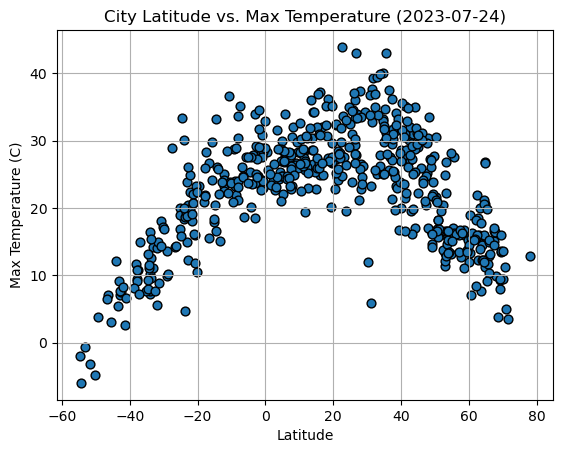

In [8]:
# Build scatter plot for latitude vs. temperature
ax = city_data_df.plot.scatter("Lat", "Max Temp", grid=True, s=40, edgecolors="black", linewidths=1)

# Incorporate the other graph properties
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (C)")
ax.set_title(f"City Latitude vs. Max Temperature ({datetime.utcfromtimestamp(city_data_df['Date'][1]).strftime('%Y-%m-%d')})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

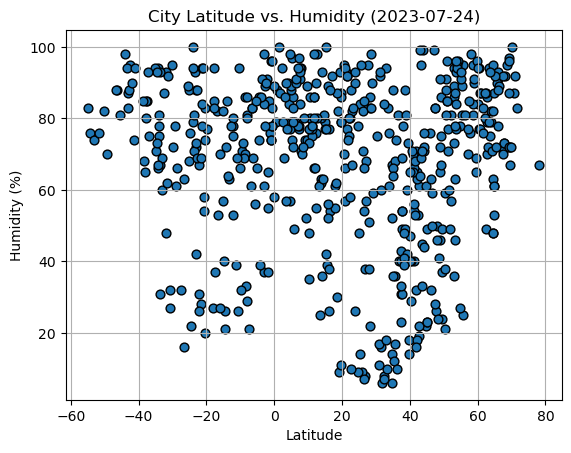

In [9]:
# Build the scatter plots for latitude vs. humidity
ax = city_data_df.plot.scatter("Lat", "Humidity", grid=True, s=40, edgecolors="black", linewidths=1)

# Incorporate the other graph properties
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.set_title(f"City Latitude vs. Humidity ({datetime.utcfromtimestamp(city_data_df['Date'][1]).strftime('%Y-%m-%d')})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

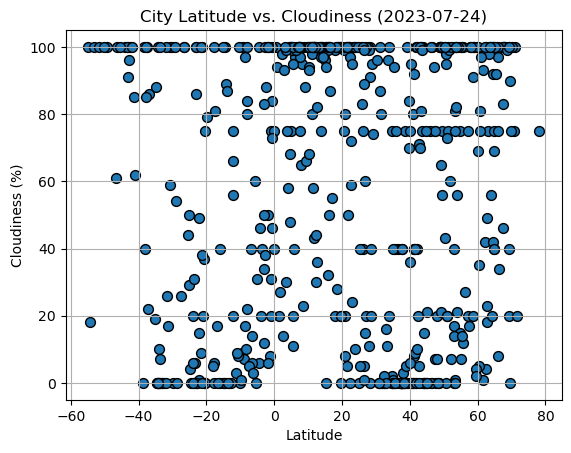

In [10]:
# Build the scatter plots for latitude vs. cloudiness
ax = city_data_df.plot.scatter("Lat", "Cloudiness", grid=True, s=50, edgecolors="black", linewidths=1)

# Incorporate the other graph properties
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.set_title(f"City Latitude vs. Cloudiness ({datetime.utcfromtimestamp(city_data_df['Date'][1]).strftime('%Y-%m-%d')})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

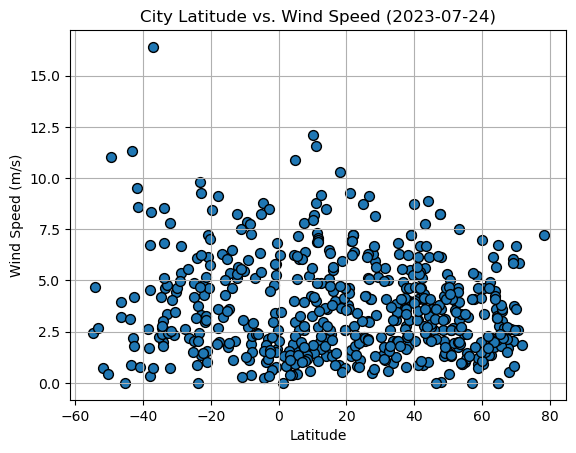

In [11]:
# Build the scatter plots for latitude vs. wind speed
ax = city_data_df.plot.scatter("Lat", "Wind Speed", grid=True, s=50, edgecolors="black", linewidths=1)

# Incorporate the other graph properties
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title(f"City Latitude vs. Wind Speed ({datetime.utcfromtimestamp(city_data_df['Date'][1]).strftime('%Y-%m-%d')})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lin_regress_plot(df, x, y):
    # Linear regression values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df[x], df[y])

    regress_values = slope*df[x] + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create plots using light markers so equation is more readable if over some data points
    ax = df.plot.scatter(x, y, color="#7FAEEC", s=30)
    plt.plot(df[x], regress_values, "r-")

    # Add labels
    ax.set_xlabel("Latitude")
    ax.set_ylabel(y)
    # programatically define where the equation is printed based on the data being plotted
    ax.annotate(line_eq,(df[x].min()+5,df[y].max()-5),fontsize=15,color="red")

    plt.show()
    # Return the regression coefficient statement through the function return
    return(f"The r-value is: {rvalue}")


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>0), :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nova sintra,14.8667,-24.7167,22.89,79,100,6.48,CV,1690225616
1,yuzhno-kurilsk,44.0306,145.8556,17.06,99,100,2.15,RU,1690225616
4,hammerfest,70.6634,23.6821,11.25,87,75,2.57,NO,1690225616
7,nizhniy kuranakh,58.8353,125.4869,16.41,90,100,0.93,RU,1690225617
8,lompoc,34.6391,-120.4579,33.21,67,75,3.60,US,1690225572


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0), :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,3.80,70,100,11.01,TF,1690225616
3,fale old settlement,-9.3852,-171.2468,28.73,71,9,7.85,TK,1690225616
5,grytviken,-54.2811,-36.5092,-5.98,76,18,4.69,GS,1690225452
6,adamstown,-25.0660,-130.1015,19.96,68,29,4.21,PN,1690225600
9,codrington,-38.2667,141.9667,11.69,68,100,1.72,AU,1690225617


###  Temperature vs. Latitude Linear Regression Plot

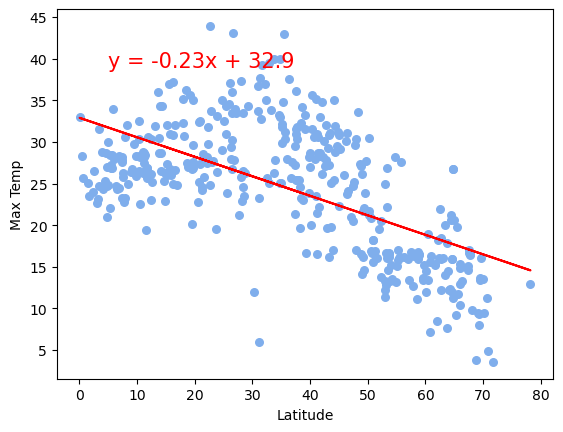

'The r-value is: -0.6125871043050513'

In [15]:
# Linear regression on Northern Hemisphere
df = northern_hemi_df
x = "Lat"
y = "Max Temp"

lin_regress_plot(df, x, y)

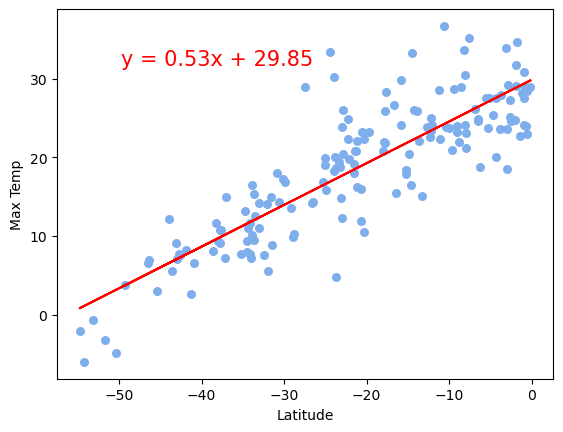

'The r-value is: 0.8554963048775782'

In [16]:
# Linear regression on Southern Hemisphere
df = southern_hemi_df
x = "Lat"
y = "Max Temp"

lin_regress_plot(df, x, y)

**Discussion about the linear relationship:** The data shows a positive relationship between latitude and maximum temperature in the southern hemisphere and a negative raltionship in the northern hemisphere. In other words, the maximum temperature tends to be higher closer to the equator. Generally, the relationship is stronger in the southern hemisphere than in northern hemisphere.

Supporting Notes: The data pull on 7/20/2023 shows a strong relationship in the southern hemisphere (0.865) than in the northern hemisphere (-0.643). The data pull on 7/21/2023 shows a strong relationship in the southern hemisphere (0.827) than in the northern hemisphere (-0.641). The data pull on 7/22/2023 shows a strong relationship in the southern hemisphere (0.827) than in the northern hemisphere (-0.547). The data pull on 7/24/2023 shows a strong relationship in the southern hemisphere (0.855) than in the northern hemisphere (-0.613).

### Humidity vs. Latitude Linear Regression Plot

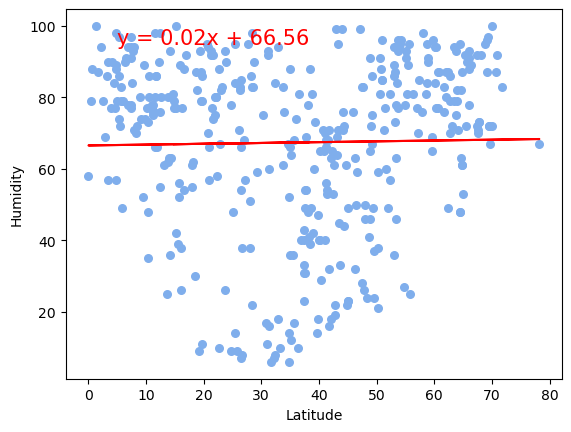

'The r-value is: 0.018944952156722043'

In [17]:
# Linear regression on Northern Hemisphere
df = northern_hemi_df
x = "Lat"
y = "Humidity"

lin_regress_plot(df, x, y)

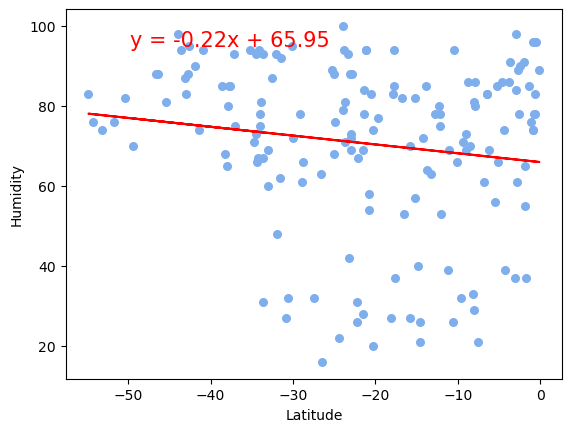

'The r-value is: -0.14959680790555246'

In [18]:
# Linear regression on Southern Hemisphere
df = southern_hemi_df
x = "Lat"
y = "Humidity"

lin_regress_plot(df, x, y)

**Discussion about the linear relationship:** Humidity is independent of latititude. Some days, the sample shows a weak correlation but the absolute value of the coefficient has remained below 0.4.

### Cloudiness vs. Latitude Linear Regression Plot

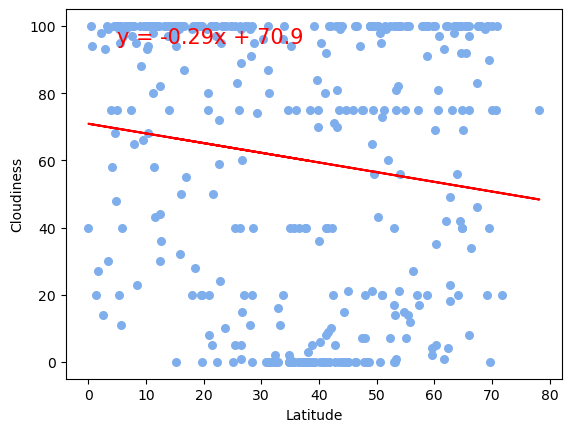

'The r-value is: -0.1425396158065129'

In [19]:
# Linear regression on Northern Hemisphere
df = northern_hemi_df
x = "Lat"
y = "Cloudiness"

lin_regress_plot(df, x, y)

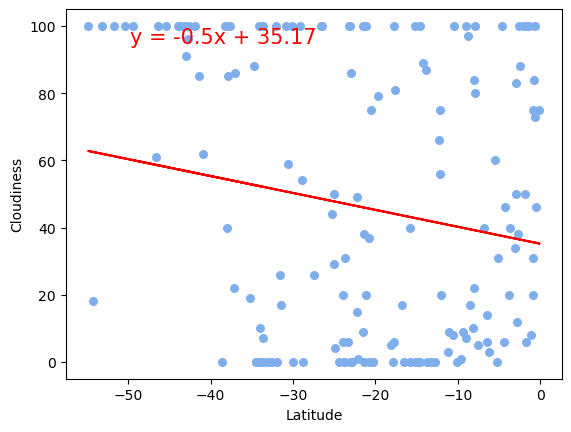

'The r-value is: -0.17426461946100294'

In [20]:
# Linear regression on Southern Hemisphere
df = southern_hemi_df
x = "Lat"
y = "Cloudiness"

lin_regress_plot(df, x, y)

**Discussion about the linear relationship:** Cloudiness is independent of latititude. Some days, the sample shows a weak correlation but the absolute value of the coefficient has remained below 0.4.

### Wind Speed vs. Latitude Linear Regression Plot

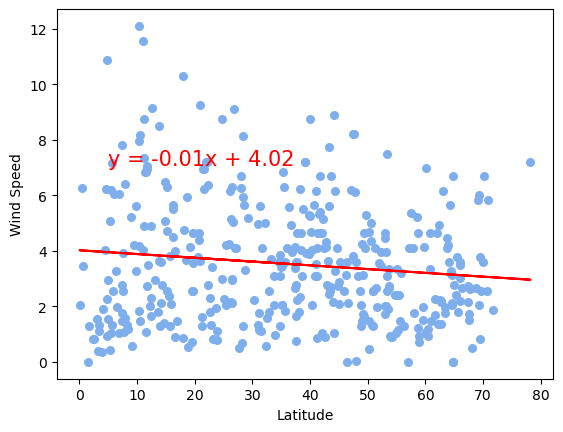

'The r-value is: -0.12320666015043324'

In [21]:
# Linear regression on Northern Hemisphere
df = northern_hemi_df
x = "Lat"
y = "Wind Speed"

lin_regress_plot(df, x, y)

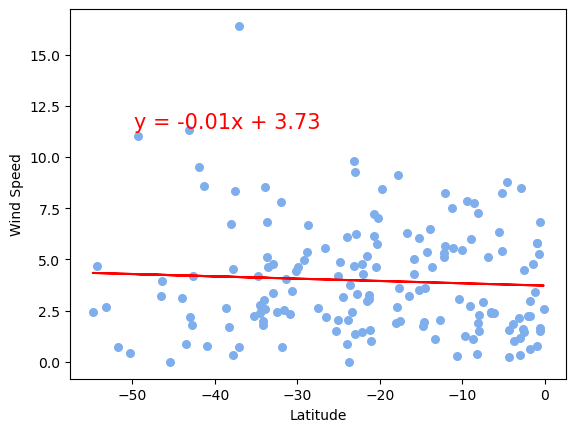

'The r-value is: -0.05945689354222274'

In [22]:
# Linear regression on Southern Hemisphere
df = southern_hemi_df
x = "Lat"
y = "Wind Speed"

lin_regress_plot(df, x, y)

**Discussion about the linear relationship:** Wind Speed is independent of latititude. Often samples show this as weaker (coefficient closest to zero) than humidity and cloudiness but not always.